In [3]:
%pip install python-binance pandas mplfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

Para conectarme a la API de Binance necesito dos claves: La apiKey y la clave secreta.
A continuación declaro 2 variables de cadena y las inicializo con las direcciones de las claves. 

In [5]:

claveApi = "vIXdGq9EGDJXuTciWJpRTkjOzQCV1w2zj75PNtzTMxfh6MpFQR2rqYYwxx0EyfEkR"
secreta = "s50oM8JhH3g7oJ8gdzGy1Iu7IlgEdUyuLHVrVQLrIxZ7MCQsqoKXaSeEzyPN9Pi3"


In [6]:
cliente = Client(claveApi, secreta)

Ahora me conecto con Binance para obtener los **tickers**. Estos son los nombres abreviados de las criptomonedas listadas en Binance

In [7]:
tickers = cliente.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.02427000'},
 {'symbol': 'LTCBTC', 'price': '0.00081100'},
 {'symbol': 'BNBBTC', 'price': '0.00604600'},
 {'symbol': 'NEOBTC', 'price': '0.00005200'},
 {'symbol': 'QTUMETH', 'price': '0.00077100'},
 {'symbol': 'EOSETH', 'price': '0.00030670'},
 {'symbol': 'SNTETH', 'price': '0.00001700'},
 {'symbol': 'BNTETH', 'price': '0.00020260'},
 {'symbol': 'BCCBTC', 'price': '0.00000000'},
 {'symbol': 'GASBTC', 'price': '0.00002680'},
 {'symbol': 'BNBETH', 'price': '0.24900000'},
 {'symbol': 'BTCUSDT', 'price': '109499.99000000'},
 {'symbol': 'ETHUSDT', 'price': '2657.66000000'},
 {'symbol': 'HSRBTC', 'price': '0.00000000'},
 {'symbol': 'OAXETH', 'price': '0.00000000'},
 {'symbol': 'DNTETH', 'price': '0.00000000'},
 {'symbol': 'MCOETH', 'price': '0.00000000'},
 {'symbol': 'ICNETH', 'price': '0.00000000'},
 {'symbol': 'MCOBTC', 'price': '0.00000000'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00000000'},
 {'symbol': 'LRCBTC', '

In [8]:
type(tickers)

list

Como tickers es una lista de diccionarios de Python puedo accesar sus elementos usando índices, por ejemplo:

In [9]:
tickers[0]

{'symbol': 'ETHBTC', 'price': '0.02427000'}

Como tickers es una lista de diccionarios (filas de diccionarios), tendremos 2 índices para accesar sus elementos: un índice entero (empezando en cero) para accesar la fila y los nombres de las  columnas (par Clave/Valor) para accesar los elementos en columnas. Ejemplo:

In [10]:
tickers[0]['symbol']

'ETHBTC'

In [11]:
tickers[0]['price']

'0.02427000'

In [12]:
print(f"El valor del par {tickers[500]['symbol']} es ${tickers[500]['price']}")

El valor del par ATOMBNB es $0.00739000


Si quiero encontrar un par dado y su posición en la lista (índice) se puede hacer mediante el siguiente código:

In [13]:
def encontrar_par(par, tickers):
    for i, ticker in enumerate(tickers):
        if ticker['symbol'] == par:
            return i
    return None
par = 'SOLUSDT'
indice = encontrar_par(par, tickers)
print(indice)
if indice:
    print(f"El valor del par {tickers[indice]['symbol']} es ${tickers[indice]['price']}")
else:
    print("No se encontró el par")

779
El valor del par SOLUSDT es $154.51000000


Es conveniente poner la lista de tickers en un dataset de pandas porque este se va a usar para efectos de procesamiento, por ejemplo graficación:

In [14]:
ticker_df = pd.DataFrame(tickers)
# imprime las primeras 5 filas del dataframe
print(ticker_df.head())

    symbol       price
0   ETHBTC  0.02427000
1   LTCBTC  0.00081100
2   BNBBTC  0.00604600
3   NEOBTC  0.00005200
4  QTUMETH  0.00077100


In [15]:
# para imprimir las 5 últimas filas del dataframe
print(ticker_df.tail())

           symbol       price
3159    SAHARABNB  0.00011629
3160  SAHARAFDUSD  0.07760000
3161    SAHARATRY  3.09150000
3162      LPTUSDC  6.19200000
3163      RVNUSDC  0.01305000


In [16]:
# Es posible indexar el dataframe por el nombre de las columnas:
ticker_df.set_index('symbol', inplace=True)
ticker_df.head()

,price
symbol,
ETHBTC,0.02427000
LTCBTC,0.00081100
BNBBTC,0.00604600
NEOBTC,0.00005200
QTUMETH,0.00077100


In [17]:
# si quiero escoger el precio de un par en específico uso el método loc()
ticker_df.loc['ETHBTC']

price    0.02427000
Name: ETHBTC, dtype: object

In [18]:
# el valor de 'price' es un string
ticker_df.loc['ETHBTC']["price"]

'0.02427000'

In [19]:
# para convertirloa numérico uso la función float()
float(ticker_df.loc['ETHBTC']["price"])

0.02427

Ahora se usa el método <code>get_order_book()</code> del  objeto **cliente** el cual realiza una llamada a la API de BINANCE solicitando el libro de órdenes de un par de trading específico. Este libro es una lista de todas las órdenes de compra (bids) y venta (asks) que actualmente están abiertas en el mercado de ese par. Cada orden del libro contiene información como el precio y la cantidad. 

In [20]:
depth = cliente.get_order_book(symbol = 'SOLUSDT')
depth

{'lastUpdateId': 22245235953,
 'bids': [['154.51000000', '30.87400000'],
  ['154.50000000', '19.18800000'],
  ['154.49000000', '265.48200000'],
  ['154.48000000', '349.82300000'],
  ['154.47000000', '367.73000000'],
  ['154.46000000', '647.68400000'],
  ['154.45000000', '552.85400000'],
  ['154.44000000', '484.66000000'],
  ['154.43000000', '407.45100000'],
  ['154.42000000', '414.81200000'],
  ['154.41000000', '527.92800000'],
  ['154.40000000', '345.70900000'],
  ['154.39000000', '463.72400000'],
  ['154.38000000', '838.37200000'],
  ['154.37000000', '471.22000000'],
  ['154.36000000', '281.81600000'],
  ['154.35000000', '209.02000000'],
  ['154.34000000', '412.12400000'],
  ['154.33000000', '588.74500000'],
  ['154.32000000', '299.47400000'],
  ['154.31000000', '506.57500000'],
  ['154.30000000', '746.18600000'],
  ['154.29000000', '972.66500000'],
  ['154.28000000', '412.61500000'],
  ['154.27000000', '726.77300000'],
  ['154.26000000', '367.23100000'],
  ['154.25000000', '342.2290

In [21]:
# el tipo de depth es un diccionario
type(depth)

dict

In [22]:
# las claves del diccionario son 'lastUpdateId', 'bids' y 'asks'
depth.keys()

dict_keys(['lastUpdateId', 'bids', 'asks'])


Es importante convertir el diccionario <code>depth</code> en un DataFrame con el objetivo de visualización de los datos. Por ejemplo, si queremos visualizar solo las compras (bids) organizadas en columnas precio y volumen:

In [23]:
depth_df = pd.DataFrame(depth['bids'], columns=['Precio', 'Volumen'])
depth_df.head()

,Precio,Volumen
0,154.51000000,30.87400000
1,154.50000000,19.18800000
2,154.49000000,265.48200000
3,154.48000000,349.82300000
4,154.47000000,367.73000000


In [24]:
#el dataframe depth_df es del tipo object (string)
depth_df.dtypes

Precio     object
Volumen    object
dtype: object


<h4>Obtener Datos Históricos</h4>
Si queremos graficar los datos o realizar cálculos con ellos, este formato (string) no es el más conveniente. Entonces mejor sería obtener un conjunto de datos más conveniente (datos históricos) de un par específico y luego realizar un pre-procesamiento de ellos para luego realizar las operaciones deseadas. A continuación se obtienen los datos históricos de un par:

In [25]:
historico = cliente.get_historical_klines('SOLUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2022')
historico

[[1640995200000,
  '170.01000000',
  '179.20000000',
  '169.93000000',
  '179.06000000',
  '634599.39000000',
  1641081599999,
  '110585214.91650000',
  179793,
  '328250.16000000',
  '57202310.01530000',
  '0'],
 [1641081600000,
  '179.06000000',
  '179.53000000',
  '174.31000000',
  '176.35000000',
  '620087.38000000',
  1641167999999,
  '109509310.71340000',
  176256,
  '313106.42000000',
  '55294227.83680000',
  '0'],
 [1641168000000,
  '176.34000000',
  '176.49000000',
  '166.59000000',
  '170.15000000',
  '1031316.43000000',
  1641254399999,
  '177240351.97020000',
  250131,
  '537423.71000000',
  '92331450.11780000',
  '0'],
 [1641254400000,
  '170.14000000',
  '173.93000000',
  '166.47000000',
  '167.72000000',
  '1041332.63000000',
  1641340799999,
  '176538222.72980000',
  264666,
  '507127.47000000',
  '86029904.46010000',
  '0'],
 [1641340800000,
  '167.74000000',
  '171.32000000',
  '144.92000000',
  '154.52000000',
  '1659848.17000000',
  1641427199999,
  '266979906.63840

In [26]:
type(historico)

list

Los datos históricos (klines) que entrega la API de Binance cuando se usa el método get_historical_klines corresponde a una lista de listas, donde cada sublista tiene 12 elementos con el siguiente NombreSsignificado:
1. [0]: Open time: Timestamp de apertura (ms)
2. [1]: Open: Precio de apertura (string)
3. [2]: High: Precio más alto (string)
4. [3]: Low: Precio más bajo (string)
5. [4]: Close: Precio de cierre (string)
6. [5]: Volume: total (string)
7. [6]: Close time: Timestamp de cierr (ms)
8. [7]: Quote asset volume: Volumen de operaciones (string)
9. [8]: Number of trades: Número de trades (entero)
10. [9]: Taker buy base asset volume: volumen de compra base  (string)
11. [10]: Taker buy quote asset volume:  Volumen de compra cotizada (string)
12. [11]: Ignore: Ignorar este campo  (siempre "0")

Es importante convertir estos datos a un formato más legible (el más conveniente es un DataFrame)








In [27]:
# se convierte el histórico en un dataframe
historico_df = pd.DataFrame(historico, columns=['Open time', 'Open', 'High', 'Low', 'Close',
            'Volume', 'Close time', 'QA volume', 'Number of trades',
            'TB base volume', 'TB quote volume', 'Ignore'])
historico_df.head()

,Open time,Open,High,Low,Close,Volume,Close time,QA volume,Number of trades,TB base volume,TB quote volume,Ignore
0,1640995200000,170.01000000,179.20000000,169.93000000,179.06000000,634599.39000000,1641081599999,110585214.91650000,179793,328250.16000000,57202310.01530000,0
1,1641081600000,179.06000000,179.53000000,174.31000000,176.35000000,620087.38000000,1641167999999,109509310.71340000,176256,313106.42000000,55294227.83680000,0
2,1641168000000,176.34000000,176.49000000,166.59000000,170.15000000,1031316.43000000,1641254399999,177240351.97020000,250131,537423.71000000,92331450.11780000,0
3,1641254400000,170.14000000,173.93000000,166.47000000,167.72000000,1041332.63000000,1641340799999,176538222.72980000,264666,507127.47000000,86029904.46010000,0
4,1641340800000,167.74000000,171.32000000,144.92000000,154.52000000,1659848.17000000,1641427199999,266979906.63840000,460130,775826.33000000,125014421.95460000,0


Casi todos los elementos de historico son de tipo string (a excepción de los timestamp y el numero de operaciones), entonces es necesario convertir a flotante los elementos de interés, sobre todo los precios porque con ellos es que se realizarán los cálculos previstos en el proyecto. El tipo de los elementos se ve en la próxima celda. El tipo object es básicamente string.

In [28]:
historico_df.dtypes

Open time            int64
Open                object
High                object
Low                 object
Close               object
Volume              object
Close time           int64
QA volume           object
Number of trades     int64
TB base volume      object
TB quote volume     object
Ignore              object
dtype: object

In [29]:
# Lo primero que se va a hacer es convertir los timstampo a un formato de fecha y hora
historico_df['Open time'] = pd.to_datetime(historico_df['Open time'], 
     unit='ms')


In [30]:
historico_df['Close time'] = pd.to_datetime(historico_df['Close time'], 
     unit='ms')

In [31]:
historico_df.head()

,Open time,Open,High,Low,Close,Volume,Close time,QA volume,Number of trades,TB base volume,TB quote volume,Ignore
0,2022-01-01,170.01000000,179.20000000,169.93000000,179.06000000,634599.39000000,2022-01-01 23:59:59.999,110585214.91650000,179793,328250.16000000,57202310.01530000,0
1,2022-01-02,179.06000000,179.53000000,174.31000000,176.35000000,620087.38000000,2022-01-02 23:59:59.999,109509310.71340000,176256,313106.42000000,55294227.83680000,0
2,2022-01-03,176.34000000,176.49000000,166.59000000,170.15000000,1031316.43000000,2022-01-03 23:59:59.999,177240351.97020000,250131,537423.71000000,92331450.11780000,0
3,2022-01-04,170.14000000,173.93000000,166.47000000,167.72000000,1041332.63000000,2022-01-04 23:59:59.999,176538222.72980000,264666,507127.47000000,86029904.46010000,0
4,2022-01-05,167.74000000,171.32000000,144.92000000,154.52000000,1659848.17000000,2022-01-05 23:59:59.999,266979906.63840000,460130,775826.33000000,125014421.95460000,0


In [32]:
# aHora vamos a transformar los precios a numérico
columna_numerica = ['Open', 'High', 'Low',
            'Close', 'Volume', 'QA volume', 'TB base volume',
            'TB quote volume']
historico_df[columna_numerica] = historico_df[columna_numerica].apply(pd.to_numeric, axis=1)

In [33]:
historico_df.dtypes

Open time           datetime64[ns]
Open                       float64
High                       float64
Low                        float64
Close                      float64
Volume                     float64
Close time          datetime64[ns]
QA volume                  float64
Number of trades             int64
TB base volume             float64
TB quote volume            float64
Ignore                      object
dtype: object

In [34]:
historico_df.head()

,Open time,Open,High,Low,Close,Volume,Close time,QA volume,Number of trades,TB base volume,TB quote volume,Ignore
0,2022-01-01,170.01,179.20,169.93,179.06,634599.39,2022-01-01 23:59:59.999,1.105852e+08,179793,328250.16,5.720231e+07,0
1,2022-01-02,179.06,179.53,174.31,176.35,620087.38,2022-01-02 23:59:59.999,1.095093e+08,176256,313106.42,5.529423e+07,0
2,2022-01-03,176.34,176.49,166.59,170.15,1031316.43,2022-01-03 23:59:59.999,1.772404e+08,250131,537423.71,9.233145e+07,0
3,2022-01-04,170.14,173.93,166.47,167.72,1041332.63,2022-01-04 23:59:59.999,1.765382e+08,264666,507127.47,8.602990e+07,0
4,2022-01-05,167.74,171.32,144.92,154.52,1659848.17,2022-01-05 23:59:59.999,2.669799e+08,460130,775826.33,1.250144e+08,0


In [35]:
# para ver el número de filas y columnas del dataframe
historico_df.shape

(1286, 12)

In [36]:
historico_df.describe()

,Open time,Open,High,Low,Close,Volume,Close time,QA volume,Number of trades,TB base volume,TB quote volume
count,1286,1286.000000,1286.000000,1286.000000,1286.000000,1.286000e+03,1286,1.286000e+03,1.286000e+03,1.286000e+03,1.286000e+03
mean,2023-10-05 12:00:00,93.129401,96.636353,89.523841,93.116998,4.539418e+06,2023-10-06 11:59:59.999000576,4.119366e+08,9.088103e+05,2.260182e+06,2.056055e+08
min,2022-01-01 00:00:00,9.640000,10.090000,8.000000,9.640000,6.200874e+05,2022-01-01 23:59:59.999000,1.044420e+07,2.550000e+04,2.864149e+05,4.905480e+06
25%,2022-11-18 06:00:00,24.775000,25.507500,24.020000,24.775000,2.531438e+06,2022-11-19 05:59:59.999000064,1.103874e+08,1.963865e+05,1.240793e+06,5.370797e+07
50%,2023-10-05 12:00:00,93.070000,96.880000,88.890000,93.085000,3.646016e+06,2023-10-06 11:59:59.999000064,2.801991e+08,4.648700e+05,1.813692e+06,1.397877e+08
75%,2024-08-21 18:00:00,146.717500,151.947500,142.280000,146.717500,5.466754e+06,2024-08-22 17:59:59.999000064,5.625148e+08,1.259668e+06,2.686826e+06,2.806797e+08
max,2025-07-09 00:00:00,261.970000,295.830000,252.690000,261.970000,3.496502e+07,2025-07-09 23:59:59.999000,6.733959e+09,1.672892e+07,1.708472e+07,3.377674e+09
std,NaN,66.769749,69.095578,64.349548,66.757345,3.340747e+06,NaN,4.749551e+08,1.207510e+06,1.679615e+06,2.390100e+08


In [37]:
historico_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Open time         1286 non-null   datetime64[ns]
 1   Open              1286 non-null   float64       
 2   High              1286 non-null   float64       
 3   Low               1286 non-null   float64       
 4   Close             1286 non-null   float64       
 5   Volume            1286 non-null   float64       
 6   Close time        1286 non-null   datetime64[ns]
 7   QA volume         1286 non-null   float64       
 8   Number of trades  1286 non-null   int64         
 9   TB base volume    1286 non-null   float64       
 10  TB quote volume   1286 non-null   float64       
 11  Ignore            1286 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 120.7+ KB



<h4>VISUALIZACION</h4>
Ahora es tiempo de visualizar algunos datos. Asegurarse de tener instalado <code>mplfinance</code> y luego realizar la importacióm.

In [38]:
import mplfinance as mpf
import matplotlib.pyplot as plt

In [39]:
print(historico_df.columns)

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'QA volume', 'Number of trades', 'TB base volume', 'TB quote volume',
       'Ignore'],
      dtype='object')


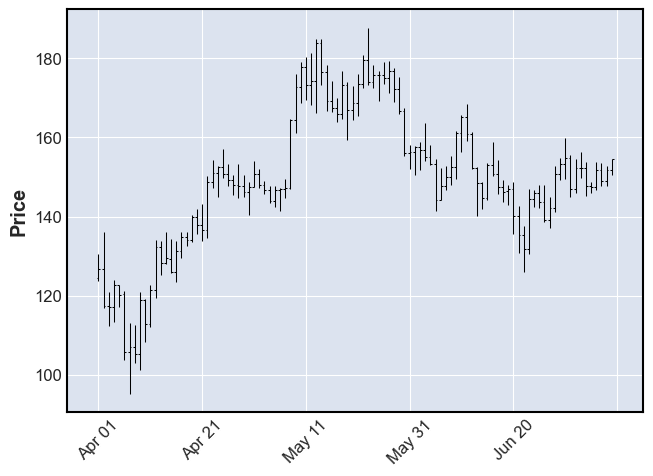

In [40]:
mpf.plot(historico_df.set_index('Close time').tail(100))